pip install pandas numpy matplotlib seaborn scikit-learn statsmodels tensorflow yfinance


Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


Data Collection

Step-by-step instructions:

1. Define the ticker symbol for Walmart. Walmart's ticker symbol is WMT.
2. Specify the date range from 1972-01-01 to 2022-12-31.
3. Fetch the data using yfinance.

In [2]:
# Define ticker symbol and date range
ticker_symbol = 'WMT'
start_date = '1972-01-01'
end_date = '2022-12-31'

# Fetch data
walmart_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Display the first few rows
print(walmart_data.head())


[*********************100%%**********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close   Volume
Date                                                                  
1972-08-25  0.021159  0.021566  0.021159  0.021484   0.011664  7526400
1972-08-28  0.021484  0.021647  0.021403  0.021403   0.011620  2918400
1972-08-29  0.021322  0.021322  0.021159  0.021159   0.011488  5836800
1972-08-30  0.021159  0.021159  0.020996  0.021159   0.011488  1228800
1972-08-31  0.020996  0.020996  0.020833  0.020833   0.011311  2611200


## Data Preprocessing

1. Handling missing values: Check for and handle any missing data.
2. Reset index: Ensure the date is a column for easier manipulation.
3. Selecting relevant columns: We'll focus on the 'Close' price for prediction.


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


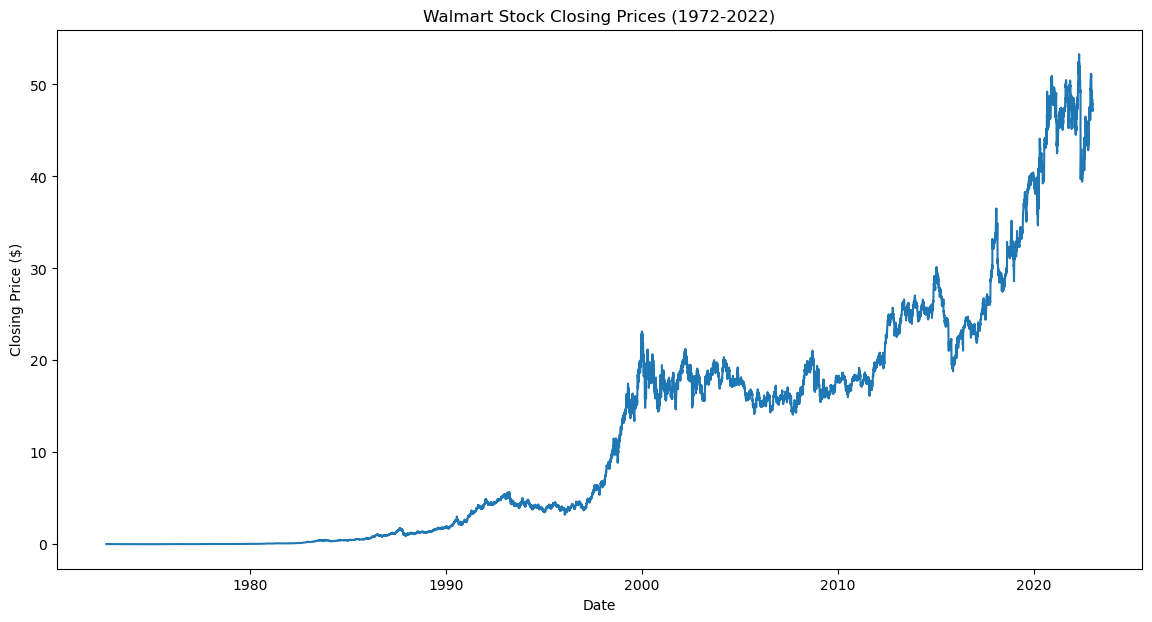

In [3]:
# Check for missing values
print(walmart_data.isnull().sum())

# Since there are no missing values, proceed to reset index
walmart_data.reset_index(inplace=True)

# Selecting the 'Date' and 'Close' columns
walmart_data = walmart_data[['Date', 'Close']]

# Visualizing the closing price over time
plt.figure(figsize=(14, 7))
plt.plot(walmart_data['Date'], walmart_data['Close'])
plt.title('Walmart Stock Closing Prices (1972-2022)')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.show()

Exploratory Data Analysis (EDA)

1. Descriptive statistics: Get summary statistics of the closing prices.
2. Moving averages: Calculate and plot short-term and long-term moving averages.
3. Seasonality and trends: Decompose the time series to observe components.

count    12697.000000
mean        12.382629
std         13.046725
min          0.005208
25%          0.476563
50%          6.197917
75%         19.139999
max         53.290001
Name: Close, dtype: float64


/var/folders/s0/2twvhfs95kz1b69bck8s47140000gn/T/ipykernel_44043/465420809.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  walmart_data['MA50'] = walmart_data['Close'].rolling(window=50).mean()
/var/folders/s0/2twvhfs95kz1b69bck8s47140000gn/T/ipykernel_44043/465420809.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  walmart_data['MA200'] = walmart_data['Close'].rolling(window=200).mean()


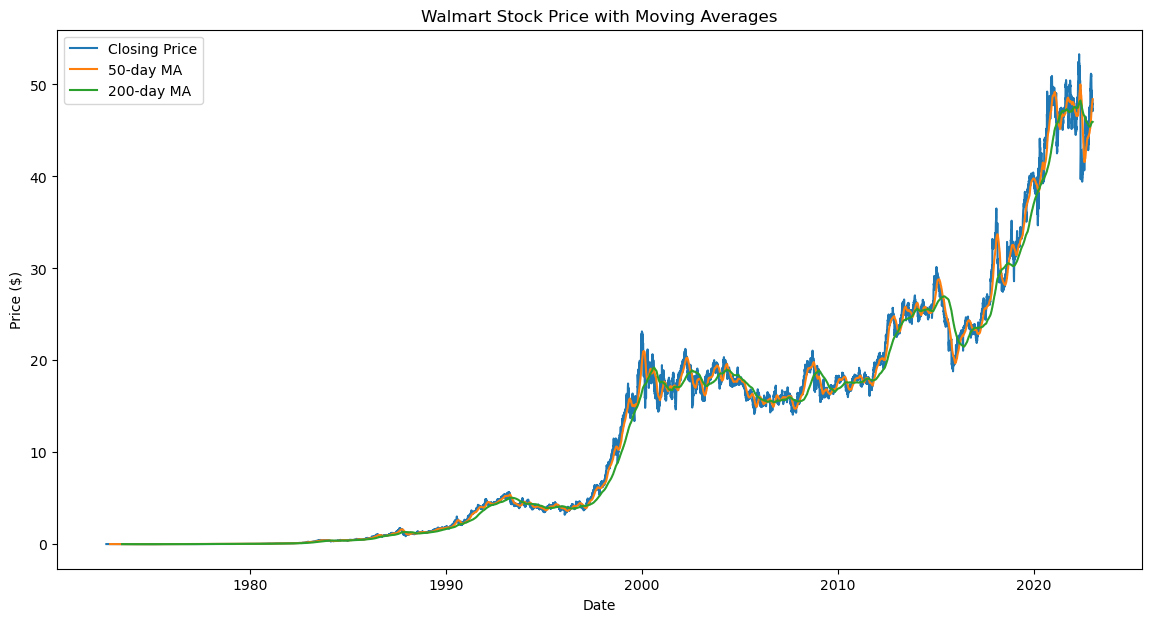

In [4]:
# Descriptive statistics
print(walmart_data['Close'].describe())

# Calculating moving averages
walmart_data['MA50'] = walmart_data['Close'].rolling(window=50).mean()
walmart_data['MA200'] = walmart_data['Close'].rolling(window=200).mean()

# Plotting moving averages
plt.figure(figsize=(14, 7))
plt.plot(walmart_data['Date'], walmart_data['Close'], label='Closing Price')
plt.plot(walmart_data['Date'], walmart_data['MA50'], label='50-day MA')
plt.plot(walmart_data['Date'], walmart_data['MA200'], label='200-day MA')
plt.title('Walmart Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()
